<a href="https://colab.research.google.com/github/HssahSaad/Mini_Projects/blob/main/Week4_Mini_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset  Parking Availability Detection: available vs. Not available  Classification

## Overview
Parking congestion is an increasingly prevalent issue in urban areas, particularly in locations with high-density establishments such as companies and hospitals. When these institutions do not provide adequate parking facilities for their employees or visitors, it creates significant challenges in surrounding areas.

- *Dataset URL:* https://universe.roboflow.com/muhammad-syihab-bdynf/parking-space-ipm1b
- *Classes:* 2 (available
,Not available)
- *Image Format:* jpg

## Structure

### Folders
The dataset is organized into two main folders:

- traindata/:
  - traindata/: Contains the training images.
    - available parking /: Contains images of available park.
    - Not available /: Contains images of not available car park.

- testdata/:
  - testdata/: Contains the testing images.
    - available parking /: Contains images of available park.
    - Not available /: Contains images of not available car park.

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of available
,Not available.

# **Data Collection**

### Install the dataset from Roboflow

In [ ]:
# Install the Roboflow:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00


### Import necessary libraries

In [ ]:
# Import the important libraries
import os
from roboflow import Roboflow
import tensorflow as tf
from tensorflow import keras
import keras
from keras import layers
from tensorflow.keras import models, preprocessing, layers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Load the Dataset

In [ ]:
# Load the dataset:
rf = Roboflow(api_key="p9wBSTzgcmNp17tzwNQm")

project = rf.workspace("muhammad-syihab-bdynf").project("parking-space-ipm1b")

version = project.version(4)

dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Parking-Space-4 in yolov5pytorch:: 100%|██████████| 15614/15614 [00:02<00:00, 5393.87it/s]


In [ ]:
# Define the directories
train_dir = os.path.join(dataset.location, "train")
valid_dir = os.path.join(dataset.location, "valid")
test_dir = os.path.join(dataset.location, "test")

In [ ]:
# Debugging: Print the directory paths and check if they exist
print("Train directory path:", train_dir)
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory path:", valid_dir)
print("Validation directory exists:", os.path.exists(valid_dir))
print("Test directory path:", test_dir)
print("Test directory exists:", os.path.exists(test_dir))

Train directory path: /content/Parking-Space-4/train
Train directory exists: True
Validation directory path: /content/Parking-Space-4/valid
Validation directory exists: True
Test directory path: /content/Parking-Space-4/test
Test directory exists: True


### Split the dataset into Trainning and validation

In [ ]:
# If the directories exist, proceed with loading the datasets
if os.path.exists(train_dir) and os.path.exists(valid_dir):
    import tensorflow as tf
    from tensorflow import keras

    image_size = (256, 256)
    batch_size = 32

    train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256),
    seed=1337,
    validation_split=0.2,
    subset='training',
    shuffle=True
)

    valid_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256),
    seed=1337,
    validation_split=0.2,
    subset='validation',
    shuffle=True
)
    test_ds = keras.utils.image_dataset_from_directory(
        directory=test_dir,
        labels='inferred',
        label_mode='binary',
        batch_size=batch_size,
        image_size=image_size,
        shuffle=False
    )

else:
    print("One or more directories do not exist. Please check the paths.")

Found 7017 files belonging to 2 classes.
Using 5614 files for training.
Found 7017 files belonging to 2 classes.
Using 1403 files for validation.
Found 226 files belonging to 2 classes.


#**Data Preprocessing**

### Data Augmentation

In [ ]:
# Define augmentation layers
augmentation_layers = [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomRotation(0.1),
    layers.RandomZoom(height_factor=0.5, width_factor=0.5),
    layers.RandomBrightness(factor=0.2),
]

In [ ]:
# Define the data augmentation function
def data_augmentation(images):
    for layer in augmentation_layers:
        images = layer(images)
    return images

In [ ]:
# Apply augmentation to the training dataset
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x), y)
)

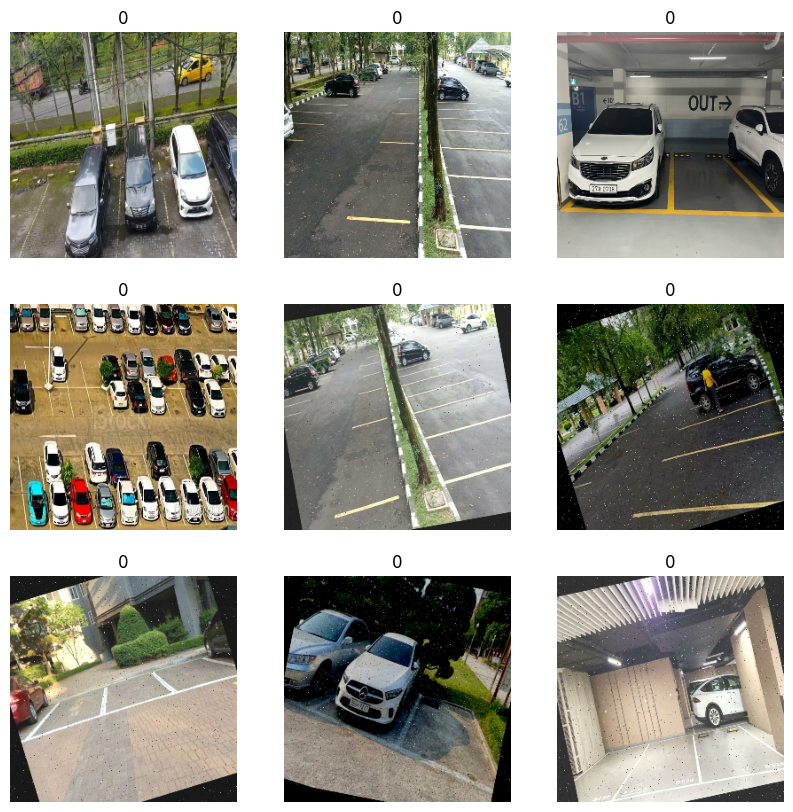

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# **Model Selection**

### Building a simple CNN model

In [ ]:
# Define the CNN model
model_cnn = keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
])

model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,870,721 (64.36 MB)

 Trainable params: 16,870,721 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Implementation**

### Compile the Model
Compile your model by specifying the optimizer, loss function

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])

In [ ]:
# Set up callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
]

### Train the Model
Train the model using the training data and validate it using the validation data.

In [ ]:
# Train the model
model_cnn.fit(
    train_ds,
    epochs=3,
    callbacks=callbacks,
    validation_data=valid_ds,
)

Epoch 1/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - binary_accuracy: 0.9675 - loss: 0.5540 - val_binary_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - binary_accuracy: 1.0000 - loss: 0.0000e+00 - val_binary_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - binary_accuracy: 1.0000 - loss: 0.0000e+00 - val_binary_accuracy: 1.0000 - val_loss: 0.0000e+00


### Evaluate the Model
Evaluate the performance of your model using the validation set.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_cnn.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - binary_accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 1.0000


# Conclusion

Our project aims to revolutionize how parking availability is monitored and managed. CNNs are adept at processing visual data, making them well-suited for analyzing images from parking lot cameras or satellite imagery to detect available parking spots, assess occupancy levels, and monitor congestion in real-time.

# Project Team:

#### 1- Hssah Alshserihi - Data collection and Data preprocessing
#### 2- Razan Alharbi - Data preprocessing and Model trainning
#### 3- Tahani Alrashidi - Model implementation and Evaluate the Model